<a href="https://colab.research.google.com/github/WTokhi/The-Crowded-Data-Visualization-Sector/blob/master/The_crowded_data_visualization_sector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Crowded Data Visualization Sector


### Matplotlib and Seaborn essentials

Datavisualisatie is een belangrijke component van de skillset van elke data scientist. Binnen python ecosystem zijn er verschillende visualisatie libraries waaruit men kan kiezen en de keuze is afhankelijk van de doelstelling. Hieronder vind je een kort overzicht van de verschillende libraries.

* Statistische analyse: Seaborn, Altair, Plotnine, Bokeh, Matplotlib 
* Geografische data: Geoplot
* Grote datasets: Datashader

[Matplotlib](https://matplotlib.org/) is een van de oudste datavisualisatie libraries. Het begon met het idee om de functionaliteiten van [MATLAB](https://www.mathworks.com/products/matlab.html) (is een software dat gebruikt wordt voor wiskundige toepassingen in zowel de industrie als de academische wereld) na te bootsen. De eerste versie kwam uit rond 2003 en sindsdien heeft het een grote userbase gekregen. Matplotlib wordt niet alleen gebruikt om inzichten te creeren maar er zijn ook andere python libraries die gebouwd zijn op Matplotlib zoals Seaborn, SHAP, LIME en zelfs de .plot() methode van pandas. Daarom vind ik dat ondanks welke library je uitkiest het handig is om Matplotlib in de basis te snappen. 

Als je meer gericht bent op statistisch onderzoek en iets nieuws wil uitproberen dan is het aan te raden om Altair te proberen. Mocht je meer wil weten dan verwijs ik je naar de blog van [Remco Rodenburg](https://colab.research.google.com/github/rrodenburg/KnowledgeSharing/blob/main/DataBaaS/gg_in_python_altair.ipynb#scrollTo=50ee8627-bae5-46ed-a637-2389c1dec1c5).

Wat ik in deze blog wil laten zien is hoe ik gebruik maak van Matplotlib om (sub)plots te organiseren en customizen met als doel om mijn verhaal aan de man te brengen. Hiervoor wil ik ingaan op de de essentiële begrippen van Matplotlib zoals `Figure`, `Axes`, `Subplots` en `Gridspec`. En als laatste wil ik kort ingaan op de hierarchie van de plot functies van Seaborn en hoe ze met Matplotlib geïntegreerd zijn. Dit is handig om te weten mocht je [Seaborn](https://seaborn.pydata.org/) plot functies gebruiken in combinatie met Matplotlib voor statistische analyse. Waar deze blog niet over gaat is welk type grafieken(barplot, scatterplot, etc) wordt aangeboden door welke library want in de basis bieden alle libraries die mogelijkheid. 

![plot](https://github.com/WTokhi/The-Crowded-Data-Visualization-Sector/blob/master/visualization_landscape.png?raw=1)


### Matplotlib plot hierarchie

De Matplotlib grafiek komt met een hierarchie. Het hoogste punt in de hierarchie is het `Figure` object dat je kan vergelijken met een fotolijst waar een of meerdere plots in kunnen komen. De plots worden `Axes` genoemd in Matplotlib jargon. Hieronder in de eerste grafiek zie je een enkel `Figure` object met een enkel `Axes` object. En bij de tweede en derde grafiek zie je een `Figure` object met meerdere `Axes` objecten. De methode `.subplots()` van module `matplotlib.pyplot` kan gebruikt worden om een `Axes` en `Figure` object aan te maken. Beide objecten hebben hun eigen methoden die aangeroepen kunnen worden om de grafieken te customizen. Laten we dit aan de hand van een paar voorbeelden proberen te begrijpen.
![plot](https://github.com/WTokhi/The-Crowded-Data-Visualization-Sector/blob/master/matplotlib_hierarchie.png?raw=1)

In [ ]:
# Laad packages
from sklearn import datasets

# Load data
df = datasets.fetch_california_housing(return_X_y=False, as_frame=True).frame
df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
8768,10.5045,36.0,6.023669,0.875740,329.0,1.946746,33.81,-118.38,5.00001
18235,4.3077,23.0,3.468379,1.003953,1374.0,2.715415,37.40,-122.10,2.93500
14375,6.5319,36.0,6.281623,1.073986,2038.0,4.863962,32.72,-117.25,3.45800
2878,0.9951,42.0,3.963211,1.197324,1038.0,3.471572,35.38,-118.97,0.48000
6113,1.5000,5.0,3.620579,1.016077,819.0,2.633441,34.13,-117.90,1.39800


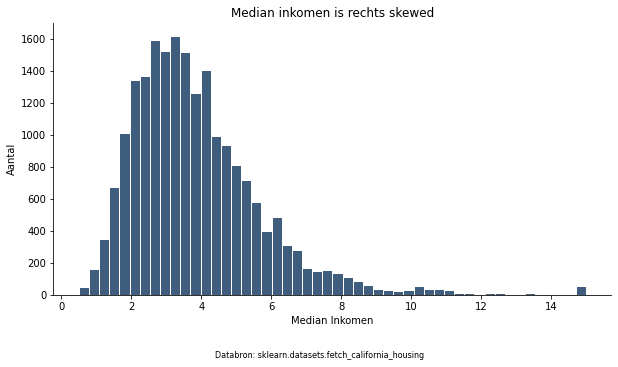

In [ ]:
import matplotlib.pyplot as plt

# Definieer grafiek ruimte. De naam conventie voor `Figure` object is fig en voor `Axes` is ax.
fig, ax = plt.subplots(nrows = 1, ncols=1, figsize=(10,5))

# Plot
ax.hist(df["MedInc"], bins=50, color="#3F5D7D", edgecolor="white")

# As-labels en title van de subplot
ax.set(xlabel='Median Inkomen', ylabel='Aantal', title='Median inkomen is rechts skewed')

# Een spine is een grenslijn van een plot. Verwijder de bovenste en de rechste spine van de subplot.  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

# Met .text() methode kan text toegevoegd worden bijvoorbeeld je databron.
fig.text(0.35, -0.05, "Databron: sklearn.datasets.fetch_california_housing", fontsize=8)
  
# Plot de grafiek
plt.show()

Het denkproces:

- Stap 1: met`.subplots()` definieer ik een grafiek ruimte met andere woorden een `Figure`(fig) object die een `Axes`(ax) object bevat. 
- Stap 2: vervolgens maak ik gebruik van .plot() methode van ax (wat een instance van `Axes` object is) om een histogram te plotten.
- Stap 3: als laatste gebruik ik .set() methode van ax om labels en title toe te voegen aan de plot.

Als we meerdere plots willen realiseren kan dat door de parameters nrows of/en ncols van `.subplots()` methode te gebruiken. Wat `.subplots()` eigenlijk doet is dat het een `Figure` object aanmaakt en vervolgens maakt het er een grid van op basis van de waarden van nrows en ncols. Daarna kunnen `Axes` objecten worden toegekend aan de elementen van de grid. Laten we een voorbeeld nemen:

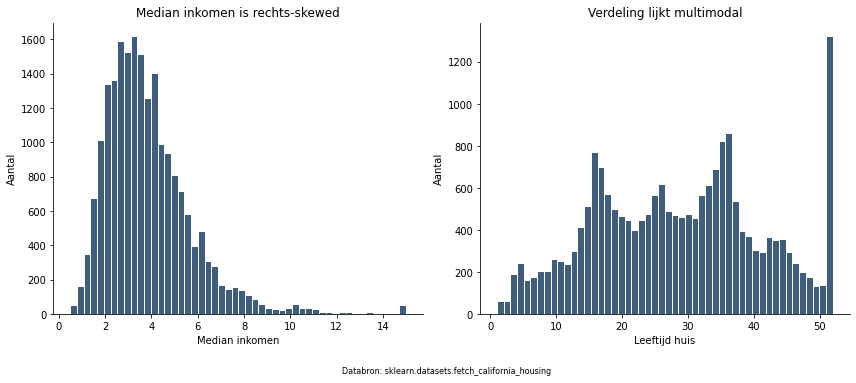

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

########################################################## Plot 1  ##########################################################

ax0.hist(df["MedInc"], bins=50, color="#3F5D7D", edgecolor="white")

ax0.set(xlabel='Median inkomen', ylabel='Aantal', title='Median inkomen is rechts-skewed')

ax0.spines["top"].set_visible(False)  
ax0.spines["right"].set_visible(False)

########################################################## Plot 2  ##########################################################

ax1.hist(df["HouseAge"], bins=50, color="#3F5D7D", edgecolor="white")

ax1.set(xlabel='Leeftijd huis', ylabel='Aantal', title='Verdeling lijkt multimodal')

ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)

# tight_layout() zorgt ervoor dat de plots binnen de figure blijven en dat de ze niet overlappen.
fig.tight_layout()

fig.text(0.40, -0.05, "Databron: sklearn.datasets.fetch_california_housing", fontsize=8)

plt.show()

Het denkproces:

- Stap 1: met`.subplots(nrows=1, ncols=2)` heb ik een grid van 1*2 aangemaakt waar twee `Axes` objecten aan zijn toegekend.
- Stap 2: vervolgens maak ik gebruik van .hist() methode van ax0 om een plot te maken en vervolgens gebruik ik verschillende methoden van de ax0 om de plot te customizen. Voor de tweede plot geldt dezelfde redenatie.
- Stap 3: als laatste gebruik ik fig methoden om de grafiek verder op te maken.

Maar wat als we meer nadruk willen liggen op een plot door deze groter te maken dan andere plots? Dit is waar we de `GridSpec` module van Matplotlib goed kunnen gebruiken. `GridSpec` maakt ook een grid van de `Figure` object net als `.subplots()` maar wat het anders maakt is dat de eindgebruiker kan bepalen hoeveel elementen van een grids hij/zij wil toekennen aan een `Axes` object.

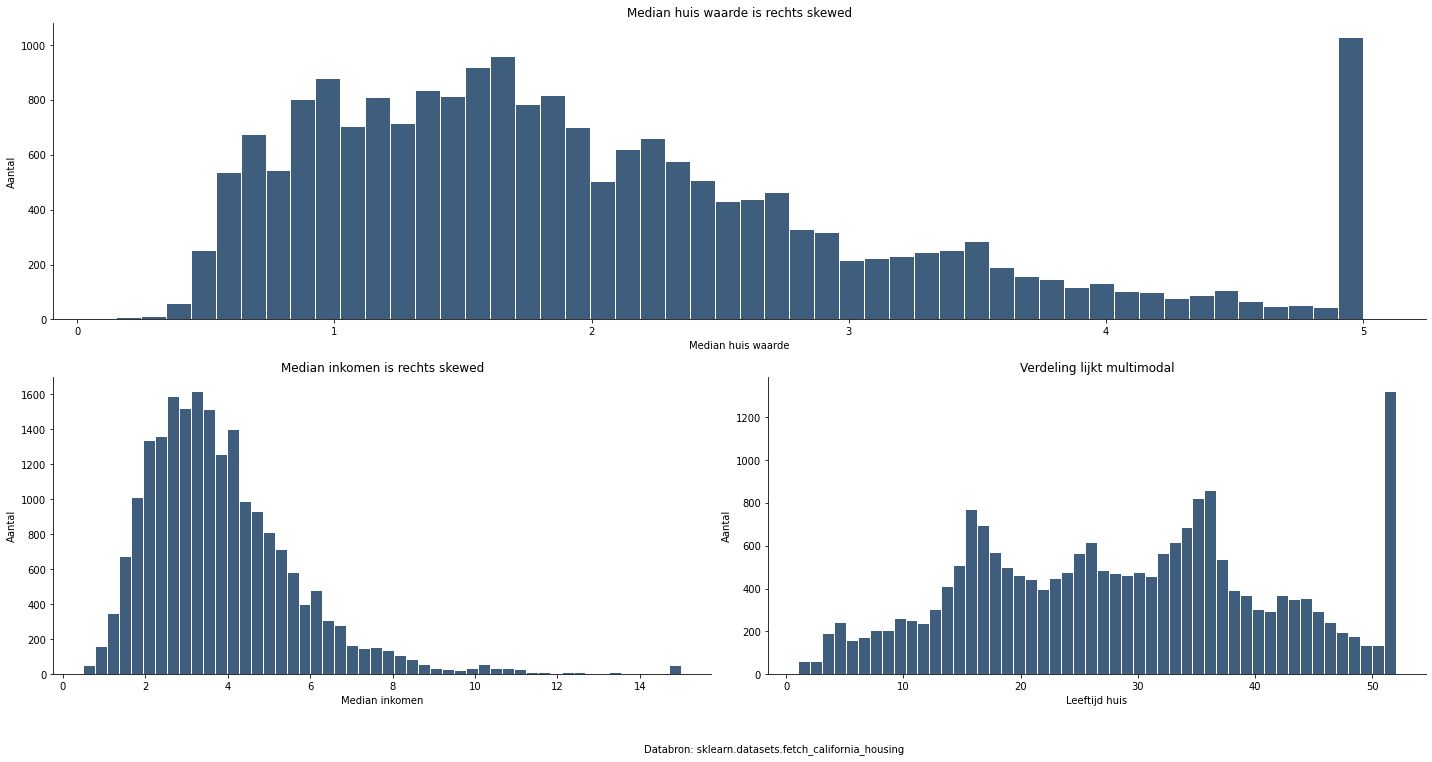

In [ ]:
from matplotlib import gridspec

# Definieer grafiek ruimte met .figure() en gridspec.GridSpec() methoden
fig = plt.figure(figsize=(20,10))

# Met GridSpec creer ik een grid van 2*2 binnen de fig object
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

########################################################## Plot 1  ##########################################################

axs0 = fig.add_subplot(spec[0, :])
axs0.hist(df["MedHouseVal"], bins=50, color="#3F5D7D", edgecolor="white")

axs0.set(xlabel='Median huis waarde', ylabel='Aantal', title='Median huis waarde is rechts skewed')

axs0.spines["top"].set_visible(False)  
axs0.spines["right"].set_visible(False)

########################################################## Plot 2  ##########################################################

axs1 = fig.add_subplot(spec[1, 0])
axs1.hist(df["MedInc"], bins=50, color="#3F5D7D", edgecolor="white")

axs1.set(xlabel='Median inkomen', ylabel='Aantal', title='Median inkomen is rechts skewed')

axs1.spines["top"].set_visible(False)  
axs1.spines["right"].set_visible(False)

########################################################## Plot 3  ##########################################################

axs2 = fig.add_subplot(spec[1, 1])
axs2.hist(df["HouseAge"], bins=50, color="#3F5D7D", edgecolor="white")

axs2.set(xlabel='Leeftijd huis', ylabel='Aantal', title='Verdeling lijkt multimodal')

axs2.spines["top"].set_visible(False)  
axs2.spines["right"].set_visible(False)

fig.tight_layout()

fig.text(0.45, -0.05, "Databron: sklearn.datasets.fetch_california_housing", fontsize=10)

plt.show()

Het denkproces:

- Stap 1: Eerst maak ik een `Figure`(fig) object aan met `plt.figure()`.
- Stap 2: Vervolgens gebruik ik `gridspec.GridSpec()` om het `Figure` object op te splitsen in een grid van 2*2. 
- Stap 3: Met `fig.add_subplot(spec[0, :])` geef ik aan dat mijn eerste plot op de bovenste twee elementen van grids komt.
- Stap 4: Met `fig.add_subplot(spec[1, 0])` en `fig.add_subplot(spec[1, 1])` geef ik aan dat mijn tweede en derde plot op de onderste twee elementen van de grid komt.

Samenvattend met `Figure`, `Axes` en `.subplots()` kunnen we grafieken structureren en customizen en `gridspec` module geeft de mogelijkheid voor een optimalisatieslag.

  
### Seaborn plot functies hiërarchie 
Seaborn is een python library gebouwd op Matlpotlib met een sterke integratie met pandas. Seaborn heeft twee type plot functies namelijk axes-level functies en figure-level functies. Axes-level functies zijn niet heel anders dan matplotlib plot functies. Deze functies retourneren matplotlib objecten dus men kan gebruik maken van matplotlib functionaliteiten om de plots naar eigen smaak op te maken(zie boven). Met figure-level functies kan men met relatief minder code (ten opzichte van axes-level functies) plots maken maar het nadeel is dat je meer code nodig hebt mocht je de plots willen customizen.

Verder zit er een hierarchie in de plot functies van seaborn, dat is dat figure-level functies gebruik maken van axes-level functies om grafieken te maken. Het is goed om een voorbeeld te geven. Bijvoorbeeld `relplot(...., kind="", .....)` is een figure-level functie die men kan gebruiken om de relatie tussen variabelen te onderzoeken. Parameter `kind` duidt aan welk type relatie men wil onderzoeken namelijk `scatter` of `line`. Onder de motorkap maakt `relplot()` gebruik van de axes-level functie bijvoorbeeld `scatterplot()` om de relatie tussen twee variabelen te plotten. Hieronder vind je een overzicht van de hierarchie binnen seaborn plot functies. 

![plot](https://github.com/WTokhi/The-Crowded-Data-Visualization-Sector/blob/master/seaborn_hierarchy.png?raw=1)

Laten we displot() als figure-level en histplot() als axes-level functies als voorbeelden nemen om de verschillen te demonstreren, zie hieronder.

In [ ]:
import seaborn as sns

#Laad data
tips = sns.load_dataset("tips")
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


object type: <class 'seaborn.axisgrid.FacetGrid'>


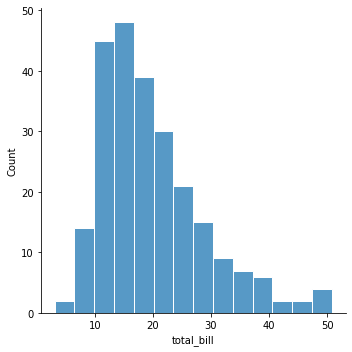

In [ ]:
figure_level = sns.displot(data=tips, x='total_bill', kind='hist', edgecolor="white")
print(f'object type: {type(figure_level)}')

object type: <class 'matplotlib.axes._subplots.AxesSubplot'>


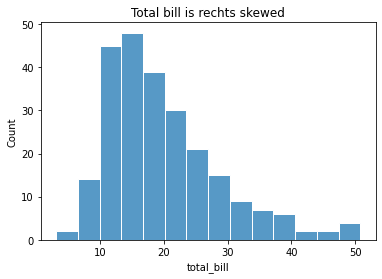

In [ ]:
axes_level = sns.histplot(data=tips, x='total_bill', edgecolor="white")
print(f'object type: {type(axes_level)}')

# Title van de plot
axes_level.set(title='Total bill is rechts skewed')

# Plot de grafiek
plt.show()

Wat anders is aan de grafieken is de layout en het type object dat geretourneerd wordt. De vraag is nu wat is het nut van een figure-level functie? Wat als je direct axes-level functie gebruikt om een plot te maken? Het antwoord is dat figure-level functies geven de mogelijkheid om meerdere plots in een figure te plotten met minimale inzet. Het is makkelijker om dit te illustereren met een voorbeeld.

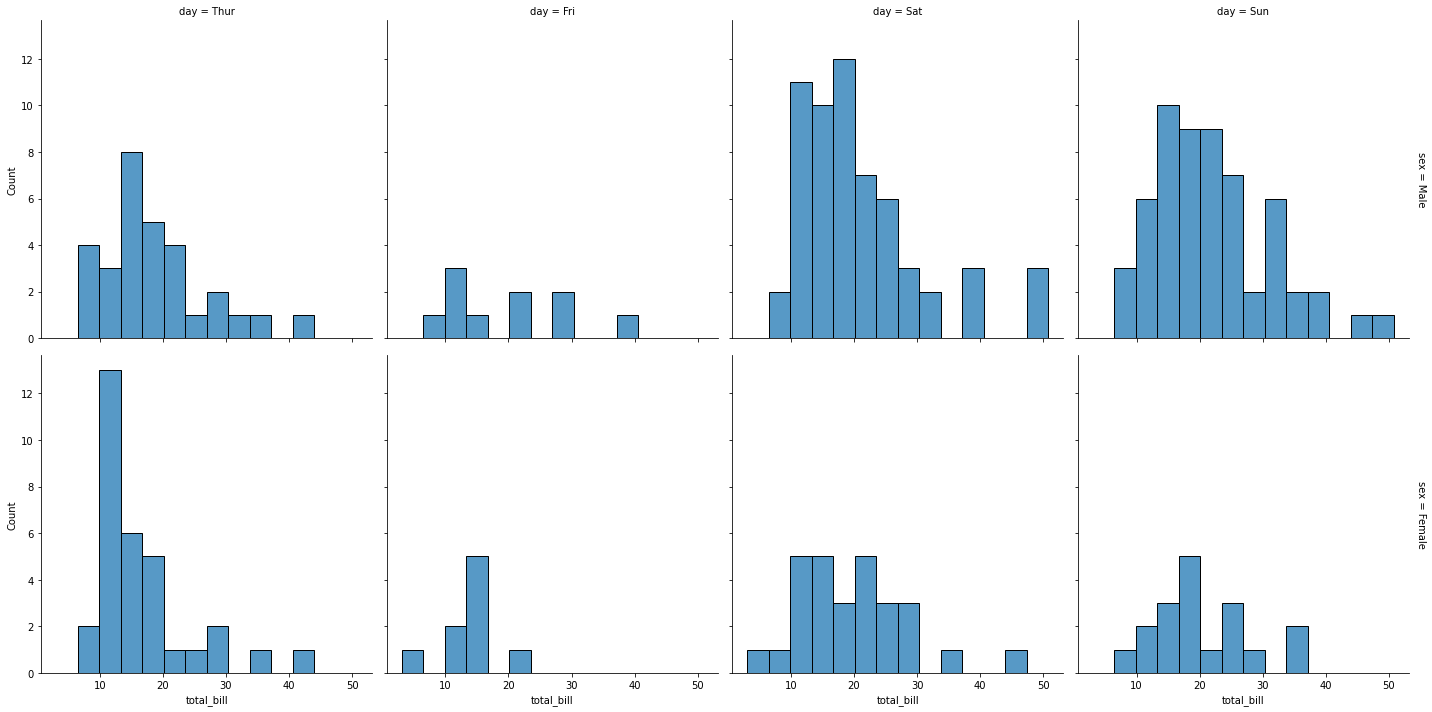

In [ ]:
g = sns.displot(tips, x="total_bill", col="day", row="sex", facet_kws=dict(margin_titles=True))

Wat hier gebeurt, is dat displot() onder de motorkap gebruik maakt van seaborn methoden om automatisch een figure met grid te creëren waar subplots worden geplot. Verder wordt de layout ook automatisch opgemaakt en dit allemaal met één regel code. Het produceren van zo'n plot met Matplotlib zou veel meer syntax nodig hebben. Hier zien we ook de sterke integratie met pandas. We geven namelijk een pandas dataframe in als argument. Seaborn gebruikt vervolgens de datastructuur van het dataframe om te plotten. Verder werken Seaborn functies goed met data objecten als numpy and list.

### Conclusie

In deze blog heb ik weergegeven hoe je met Matplotlib plots kan organiseren en customizen. Echter zijn er meerdere manieren binnen Matplotlib om dit te realiseren. Persoonlijk vind ik Matplotlib syntax-heavy maar desondanks is het handig om het in de basis te snappen omdat andere python libraries hierop gebouwd zijn. Verder heb ik geprobeerd om aan te tonen hoe Seaborn is gebouwd op Matplotlib en hoe de hierarchie er binnen Seaborn plot functies uit ziet.


### Referenties

- [Effectively using Matplotlib](https://pbpython.com/effective-matplotlib.html)
- [Seaborn: statistical data visualization](https://joss.theoj.org/papers/10.21105/joss.03021)
- [Overview of seaborn plotting functions](https://seaborn.pydata.org/tutorial/function_overview.html)
- [Plot Organization in matplotlib — Your One-stop Guide](https://towardsdatascience.com/plot-organization-in-matplotlib-your-one-stop-guide-if-you-are-reading-this-it-is-probably-f79c2dcbc801)